<h1>Handwriting recognition</h1>

In this notebook a NN its built for handwriting recognition using the  mnist dataset. 
The NN its set up using raw tensorflow understand the maths concepts behind.


Load data:

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

sess = tf.InteractiveSession()

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


<h2>Input data visualization</h2>

In [2]:
import matplotlib.pyplot as plt

def display_sample(num):
    print(mnist.train.labels[num])
    label = mnist.train.labels[num].argmax(axis=0)
    image = mnist.train.images[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' % (num,label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
display_sample(1234)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


<Figure size 640x480 with 1 Axes>

Raw input data for NN:

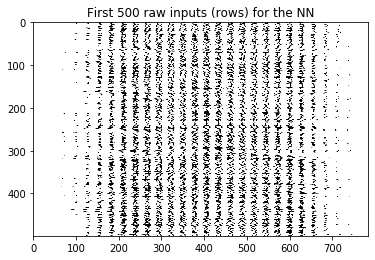

In [3]:
import numpy as np
images = mnist.train.images[0].reshape([1,784])
for i in range (1,500):
    images = np.concatenate( (images, mnist.train.images[i].reshape([1,784]) ))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.title('First 500 raw inputs (rows) for the NN')

plt.show()


<h2>Constucting the NN</h2>

Define nodes:

In [4]:
# initial input layer
input_images = tf.placeholder(tf.float32, shape=[None,784])
# output label layer
target_labels = tf.placeholder(tf.float32, shape=[None,10])

# weights
hidden_nodes= 1024

input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes,10]))
hidden_biases = tf.Variable(tf.zeros([10]))

Instructions for updating:
Colocations handled automatically by placer.


Construct the graph:

In [5]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

<h2>Loss Function</h2>

In [6]:
loss_function = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels= target_labels) )

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Gradient descent:

In [7]:
learning_parameter = 0.5
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(loss_function)

<h2>Training & Accuracy</h2>

In [8]:
correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [9]:
tf.global_variables_initializer().run()
print("Go")
for x in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
    if ((x+1) %100 == 0):
        print("Training epoch " + str(x+1))
        print("Accuracy: " + str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))

Go
Training epoch 100
Accuracy: 0.8815
Training epoch 200
Accuracy: 0.9024
Training epoch 300
Accuracy: 0.9115
Training epoch 400
Accuracy: 0.9209
Training epoch 500
Accuracy: 0.9253
Training epoch 600
Accuracy: 0.9248
Training epoch 700
Accuracy: 0.9262
Training epoch 800
Accuracy: 0.9295
Training epoch 900
Accuracy: 0.9341
Training epoch 1000
Accuracy: 0.9323
Training epoch 1100
Accuracy: 0.9322
Training epoch 1200
Accuracy: 0.9357
Training epoch 1300
Accuracy: 0.9372
Training epoch 1400
Accuracy: 0.9408
Training epoch 1500
Accuracy: 0.9386
Training epoch 1600
Accuracy: 0.9409
Training epoch 1700
Accuracy: 0.9425
Training epoch 1800
Accuracy: 0.9395
Training epoch 1900
Accuracy: 0.9392
Training epoch 2000
Accuracy: 0.9424


Which are the wrong classified samples

In [10]:
for x in range(100):
    x_train = mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    label = y_train.argmax()
    label_pred = sess.run(digit_weights, feed_dict={input_images: x_train}).argmax()
    if label_pred != label:
        plt.title("Prediction: %d Label: %d" % (prediction, label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        

NameError: name 'y_label' is not defined